In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import thinkstats2
import thinkplot
import statistics
from statistics import mode 

df = pd.read_csv('C:/Users/natac/Desktop/ThinkStats2-master/code/movies.csv', encoding='latin1')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.columns
#checking to see if we have any missing observations
df.info()
print('No missing observations discovered')
#checking to see what the max and min values are to check for something suspecious
for index in ['budget', 'gross', 'runtime', 'score', 'votes']:
    print(index, 'min =', df[index].min(), '&', index, 'max =', df[index].max(), '&', index,  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB
No missing observations discovered
budget min = 0.0 & budget max = 300000000.0 & budget
gross min = 70.0 & gross max = 936662225.0 & gross
runtime min = 50 & runtime max = 366 & runtime
score min = 1.5 & score max = 9.3 & score
votes min = 27 & votes max = 1861666 & votes


In [2]:
#Before I start analyzing the data any further and possibly removing some values, I will make a list of top-grossing movies
print('I would like to make a list of top-grossing movies.')
print('10 highest-grossing movies are:')
print('---------------------------------------------------')
using_df= df.nlargest(10, 'gross')
print(using_df['name' ])

I would like to make a list of top-grossing movies.
10 highest-grossing movies are:
---------------------------------------------------
6380                 Star Wars: The Force Awakens
5061                                       Avatar
2420                                      Titanic
6391                               Jurassic World
5723                                 The Avengers
4840                              The Dark Knight
6614                                    Rogue One
6687                                 Finding Dory
2870    Star Wars: Episode I - The Phantom Menace
6398                      Avengers: Age of Ultron
Name: name, dtype: object


In [3]:
print('I would like to make a list of top-rated movies.')
print('10 highest-rated movies are:')
print('--------------------------------------------------')
using_df= df.nlargest(10, 'score')
print(using_df['name' ])

I would like to make a list of top-rated movies.
10 highest-rated movies are:
--------------------------------------------------
1760                             The Shawshank Redemption
4840                                      The Dark Knight
1542                                     Schindler's List
1761                                         Pulp Fiction
3743        The Lord of the Rings: The Return of the King
1762                                         Forrest Gump
2860                                           Fight Club
3301    The Lord of the Rings: The Fellowship of the Ring
5280                                            Inception
881                                            Goodfellas
Name: name, dtype: object


Analysis of the variable "budget"
Number of observations for budget that equals to 0:  2182
There are a lot of values with 0.0. Almost a 3rd of the data set. This might significantly effect the results and the whole project
Decision is made to use listwise removal to have a data frame without the values 0.0 that are incorrect.
Number of observations after removing the rows with the budget value of 0.0:  4638
The lowest budget is  6000.0
Retrieving the name of the movie with the lowest "budget" value:   Following
After doing some research I can confirm that this movie indeed had such a low budget. This is a valid value
The movie with the biggest budget has the budget of  300000000.0
Retrieving the name of the movie with the highest budget:  Pirates of the Caribbean: At World's End
After doing some research I can confirm that this movie indeed had such a high budget. This is a valid value
Mean of the variable "budget with removed values that equal to 0" is  36145601.601768
Mode of the va

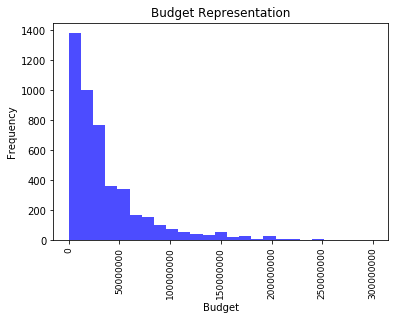

In [4]:
#Since variable budget has a minimum value that equals to zero we will start with it. 
# When looking at possible outliers, I will focus a lot on identifying if lowest and highest values of the variables are valid
#by comparing the information about them from other sources
print('Analysis of the variable "budget"')
budget = df['budget']
budgetwith0 = budget[df.budget ==0]
print("Number of observations for budget that equals to 0: ", len(budgetwith0))
print('There are a lot of values with 0.0. Almost a 3rd of the data set. This might significantly effect the results and the whole project')
print('Decision is made to use listwise removal to have a data frame without the values 0.0 that are incorrect.')
df = df[df.budget != 0.0]
print('Number of observations after removing the rows with the budget value of 0.0: ', len(df))
budget = df['budget']
min_budget = budget.min()
print('The lowest budget is ',min_budget)
low_budget = df[df.budget== 6000]
low_budget_name = low_budget['name']
print('Retrieving the name of the movie with the lowest "budget" value: ', low_budget_name.to_string(index=False))
print('After doing some research I can confirm that this movie indeed had such a low budget. This is a valid value')
max_budget = budget.max()
print("The movie with the biggest budget has the budget of ", max_budget)
high_budget = df[df.budget == 300000000.0]
high_budget_name = high_budget['name']
print("Retrieving the name of the movie with the highest budget:", high_budget_name.to_string(index=False))
print('After doing some research I can confirm that this movie indeed had such a high budget. This is a valid value')
mean_budget=budget.mean()
print('Mean of the variable "budget with removed values that equal to 0" is ', budget.mean())
print('Mode of the variable "budget with removed values that equal to 0"is ', mode(budget))
print('The variance of the variable "budget" is ', budget.var())
print('A histogram for the value "budget"')
n, bins, patches = plt.hist(x=budget, bins=int(1000/40), facecolor='blue', 
                            alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Budget Representation')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 90, fontsize=9)

print('The right tail of the histogram is significantly longer than the left one which means the distribution is positively skewed. ')
#I need to check this before submitting
print("Most of the scores are within the range of 60000 to 10000000")

Mean of the variable "gross" is  46074694.33915481
Mode of the variable "gross" is  20100000.0
The variance of the variable "gross" is  4394865815411431.5
The biggest value of "gross" is  936662225.0
Retrieving the name of the movie with the highest revenue:  Star Wars: The Force Awakens
The revenue is accurate for   Star Wars: The Force Awakens . The information on it that confirms that the value is correct was found on Wikipedia
The lowest revenue is  309.0
Retrieving the name of the movie with the lowest revenue:   Trojan War
5 variables with lowest value for revenue
309.0
1098.0
1434.0
1744.0
1785.0
Retrieving the name of the movie with the 2nd lowest revenue:   Flypaper
Retrieving the name of the movie with the 3rd lowest revenue:   Terror Firmer
Retrieving the name of the movie with the 4th lowest revenue:   The Samaritan
Retrieving the name of the movie with the 5th lowest revenue:   The Canyon
All of these values for the "gross" of the movies represent the actual revenue. I che

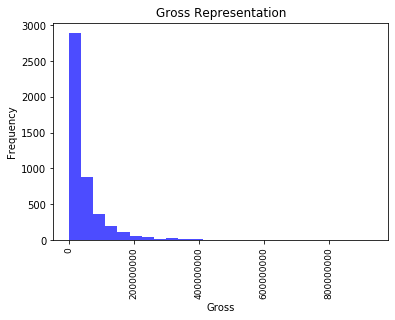

In [5]:
#Analyzing the variable "gross"
gross= df['gross']
print('Mean of the variable "gross" is ', gross.mean())
print('Mode of the variable "gross" is ', mode(gross))
print('The variance of the variable "gross" is ', gross.var())
#Checking if the highest value for gross is a potential outlier.
name = df['name']
max_gross = gross.max()
print('The biggest value of "gross" is ', max_gross)
high_gross = df[df.gross == 936662225]
high_gross_name = high_gross['name']
print("Retrieving the name of the movie with the highest revenue:", high_gross_name.to_string(index=False))
print("The revenue is accurate for ", high_gross_name.to_string(index=False), '. The information on it that confirms that the value is correct was found on Wikipedia')
min_gross = gross.min()
print('The lowest revenue is ',min_gross)
low_gross = df[df.gross == 309.0]
low_gross_name = low_gross['name']
print("Retrieving the name of the movie with the lowest revenue: ", low_gross_name.to_string(index=False))
#Analyzing some more lowest values for revenue to make sure they are valid
print("5 variables with lowest value for revenue")
gross_hist = thinkstats2.Hist(gross)
for grosses, freq in gross_hist.Smallest(5):
    print(grosses)
#retrieving information for these movies to be able to do the research on their gross. 
low_gross = df[df.gross == 1098]
low_gross_name = low_gross['name']
print("Retrieving the name of the movie with the 2nd lowest revenue: ", low_gross_name.to_string(index=False))
low_gross = df[df.gross == 1434]
low_gross_name = low_gross['name']
print("Retrieving the name of the movie with the 3rd lowest revenue: ", low_gross_name.to_string(index=False))
low_gross = df[df.gross == 1744]
low_gross_name = low_gross['name']
print("Retrieving the name of the movie with the 4th lowest revenue: ", low_gross_name.to_string(index=False))
low_gross = df[df.gross == 1785]
low_gross_name = low_gross['name']
print("Retrieving the name of the movie with the 5th lowest revenue: ", low_gross_name.to_string(index=False))
print('All of these values for the "gross" of the movies represent the actual revenue. I checked on other websites like Wikipedia, the-numbers.com, rottentomatoes.com')
#Creating a histogram   

n, bins, patches = plt.hist(x=gross, bins = int(1000/40), facecolor='blue', 
                            alpha=0.7)
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.title('Gross Representation')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 90, fontsize=9)
print("The right tail of the histogram is significantly longer than the left one which means the distribution is positively skewed. ")
      



Mean of the variable "score" is  6.356317378180231
Mode of the variable "score" is  6.7
The variance of the variable "score" is  1.0222492777268282
The lowest rated movie has a score of  1.5
Retrieving the name of the movie with the lowest score:   Saving Christmas
After doing some research on whether it is an outlier, I found similar really low rating scores for this movie on other websites.  There is no mistake here. This is a valid value.
The highest rated movie has a score of  9.3
Retrieving the name of the movie with the highest score:  The Shawshank Redemption
After doing some research on whether it is an outlier, I found similar really high rating scores for this movie on other websites.  There is no mistake here. This is a valid value.


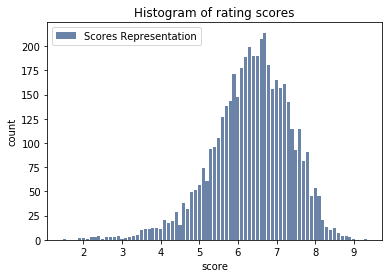

Very roughly bell-shaped distribution with the tail extending further to the left than right, which means the distribution is negatively skewed. 
Most of the scores are within the range of 5.5 to 7.5


<Figure size 576x432 with 0 Axes>

In [6]:
#Exploring the variable score.
score = df['score']
mean_score = score.mean()
print('Mean of the variable "score" is ', mean_score)
print('Mode of the variable "score" is ', mode(score)) 
print('The variance of the variable "score" is ', score.var())
#Checking if the lowest score is a potential outlier.
min_score = score.min()
print('The lowest rated movie has a score of ',min_score)
name = df['name']
low_score = df[df.score == 1.5]
low_score_name = low_score['name']
print("Retrieving the name of the movie with the lowest score: ", low_score_name.to_string(index=False))
print('After doing some research on whether it is an outlier, I found similar really low rating scores for this movie on other websites.',' There is no mistake here. This is a valid value.')
#Checking if the highest rating score is a potential outlier.
max_score = score.max()
print('The highest rated movie has a score of ', max_score)
high_score = df[df.score == 9.3]
high_score_name = high_score['name']
print("Retrieving the name of the movie with the highest score:", high_score_name.to_string(index=False))
print('After doing some research on whether it is an outlier, I found similar really high rating scores for this movie on other websites.',' There is no mistake here. This is a valid value.')

#creating a histogram
width = 0.08
hist = thinkstats2.Hist(score, label = 'Scores Representation')
thinkplot.Hist(hist, width = width)
plt.title('Histogram of rating scores')
thinkplot.Show(xlabel = 'score', ylabel = 'count')
print('Very roughly bell-shaped distribution with the tail extending further to the left than right, which means the distribution is negatively skewed. ')
print("Most of the scores are within the range of 5.5 to 7.5")


Mean of the variable "runtime" is  107.59551530832255
Mode of the variable "runtime" is  100
The variance of the variable "runtime" is  324.8210452271704
The lowest value for "runtime" is  69
Retrieving the name of the movie with the lowest "runtime" value:   The Land Before Time
            Following
After doing some research by comparing this information to the one on other movie related websites I can confirm that this movie indeed had this runtime. This is a valid value
The highest value for "runtime" is  280
Retrieving the name of the movie with the highest "runtime" value:   Until the End of the World
After doing some research by comparing this information to the one on other movie related websites I can confirm that this movie indeed had such a high runtime. This is a valid value
Histogram for the value "runtime"
The right tail of the histogram is significantly longer than the left one which means the distribution is positively skewed. We can see the mode of a 100 very well on t

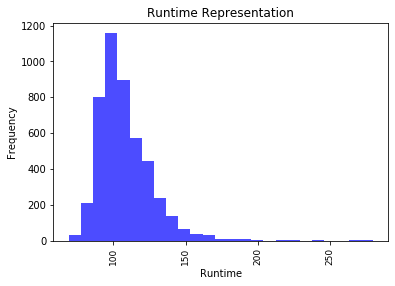

In [7]:
#Analyzing variable "runtime"
runtime = df['runtime']
print('Mean of the variable "runtime" is ', runtime.mean())
print('Mode of the variable "runtime" is ', mode(runtime)) 
print('The variance of the variable "runtime" is ', runtime.var())
#Checking if the lowest runtime value is a valid outlier.
min_runtime = runtime.min()
print('The lowest value for "runtime" is ',min_runtime)
low_runtime = df[df.runtime == 69]
low_runtime_name = low_runtime['name']
print('Retrieving the name of the movie with the lowest "runtime" value: ', low_runtime_name.to_string(index=False))
print('After doing some research by comparing this information to the one on other movie related websites I can confirm that this movie indeed had this runtime. This is a valid value')
#Checking if the highest runtime valuee is a valid value.
max_runtime = runtime.max()
print('The highest value for "runtime" is ', max_runtime)
high_runtime = df[df.runtime == 280]
high_runtime_name = high_runtime['name']
print('Retrieving the name of the movie with the highest "runtime" value: ', high_runtime_name.to_string(index=False))
print('After doing some research by comparing this information to the one on other movie related websites I can confirm that this movie indeed had such a high runtime. This is a valid value')
n, bins, patches = plt.hist(x=runtime, bins=int(1000/40), facecolor='blue', 
                            alpha=0.7)
print('Histogram for the value "runtime"')
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Runtime Representation')
#plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 90, fontsize=9)
print('The right tail of the histogram is significantly longer than the left one which means the distribution is positively skewed. We can see the mode of a 100 very well on this histogram.')

Mean of the variable "votes" is  95702.53967227253
The mode of the variable "votes" is  5757
The variance of the variable "votes" is  22316723421.30611
The lowest number of votes is  183
Retrieving the name of the movie with the lowest number of votes:   Sky Bandits
After doing some research on whether it is an outlier, I compared the number of votes on RottenTomatoes. There is no mistake here. This is a valid value.
The biggest number of votes is  1861666
Retrieving the name of the movie with the highest number of votes:  The Shawshank Redemption
After doing some research on whether it is an outlier, I found similar really high number of votes on RottenTomatoes for this movie. This is a valid value.
The right tail of the histogram is significantly longer than the left one which means the distribution is positively skewed.


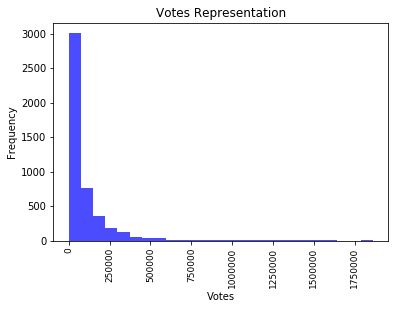

In [8]:
votes = df['votes']
print('Mean of the variable "votes" is ', votes.mean())
print('The mode of the variable "votes" is ', mode(votes))
print('The variance of the variable "votes" is ', votes.var())
    
#Checking if the lowest number of votes is a potential outlier.
min_votes = votes.min()
print('The lowest number of votes is ',min_votes)
name = df['name']
low_votes = df[df.votes == 183]
low_votes_name = low_votes['name']
print("Retrieving the name of the movie with the lowest number of votes: ", low_votes_name.to_string(index=False))
print('After doing some research on whether it is an outlier, I compared the number of votes on RottenTomatoes. There is no mistake here. This is a valid value.')
#Checking if the highest number of votes is a potential outlier.
max_votes = votes.max()
print('The biggest number of votes is ', max_votes)
high_votes = df[df.votes == 1861666]
high_votes_name = high_votes['name']
print("Retrieving the name of the movie with the highest number of votes:", high_votes_name.to_string(index=False))
print('After doing some research on whether it is an outlier, I found similar really high number of votes on RottenTomatoes for this movie. This is a valid value.')

  
#Creating a histogram    
n, bins, patches = plt.hist(x=votes, bins = int(1000/40), facecolor='blue', 
                            alpha=0.7)
    
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.title('Votes Representation')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 90, fontsize=9)

print('The right tail of the histogram is significantly longer than the left one which means the distribution is positively skewed.')
    

The mean for the variable score is  6.356317378180231
The mean for the ratings of horror movies is  5.719298245614037
The mean for the rating of all genres but the horror movies is  6.389251700680251
The difference in the means is  0.67 . As a fraction of the typical score, the difference represents about 10.5%.
By looking at the histogram I can tell that horror movies are more likely to get lower rating scores than movies of other genre


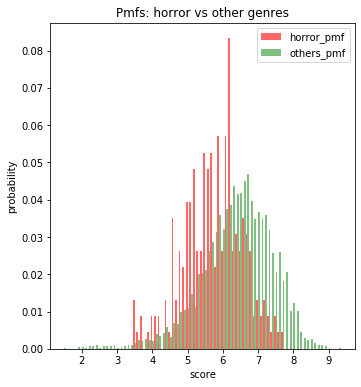

In [9]:
#Creating two pmfs to compare the probabilty of horror movies being rated lower than other genres of movies.
import warnings
warnings.filterwarnings('ignore')
mean_score=score.mean()
print("The mean for the variable score is ",mean_score)
score = df['score']
score_horror= score[df.genre=='Horror']
mean_score_horror = score_horror.mean()
print("The mean for the ratings of horror movies is ", mean_score_horror )
score_others = score[df.genre!='Horror']
mean_score_others = score_others.mean()
print("The mean for the rating of all genres but the horror movies is ", mean_score_others )
print('The difference in the means is ',round(mean_score_others - mean_score_horror, 2), '. As a fraction of the typical score, the difference represents about 10.5%.')
horror_pmf = thinkstats2.Pmf(score_horror, label = 'horror_pmf')
others_pmf = thinkstats2.Pmf(score_others, label = 'others_pmf')
thinkplot.PrePlot(2, cols =2)
thinkplot.Hist(horror_pmf, align='right', color = 'red', width = 0.05)
thinkplot.Hist(others_pmf, align = 'left' , alpha = 0.5, color = 'green', width = 0.05)
plt.legend(loc="upper left")
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Pmfs: horror vs other genres')
thinkplot.Config(xlabel = 'score', ylabel = 'probability')
print('By looking at the histogram I can tell that horror movies are more likely to get lower rating scores than movies of other genre')

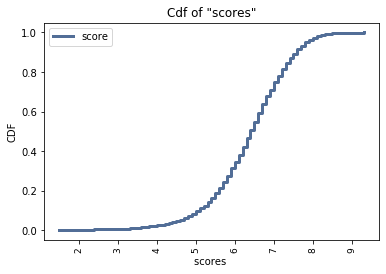

<Figure size 576x432 with 0 Axes>

In [10]:
#Creating CDF of the variable "score"
cdf = thinkstats2.Cdf(score, label = 'score')
thinkplot.Cdf(cdf)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 90, fontsize=9)
plt.title('Cdf of "scores"')
thinkplot.Show(xlabel = 'scores ', ylabel = 'CDF', )


In [11]:
#Looking at the CDF graph I can tell that the median value for the score is around 6.3. 
#The minimum value is around 1.4, the maximum around 9.3. 
#Also, it looks like about 10% of scores are below the score of 5.2 and 90% of scores are below the rating of 7.5.

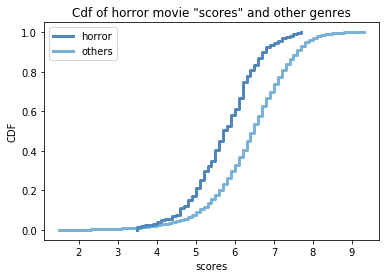

We can see that horror movies tend to be rated lower than other genres of movies


<Figure size 576x432 with 0 Axes>

In [12]:
#Comparing CDFs of horror movie scores and those of other genres
horror_cdf = thinkstats2.Cdf(score_horror, label = 'horror')
other_cdf = thinkstats2.Cdf(score_others, label = 'others')
thinkplot.PrePlot(2)
thinkplot.Cdfs([horror_cdf, other_cdf])
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Cdf of horror movie "scores" and other genres')
plt.legend(loc="upper left")
thinkplot.Show(xlabel = 'scores', ylabel = 'CDF')
print('We can see that horror movies tend to be rated lower than other genres of movies')

In [13]:
#The graph reflects that horror movies tend to be rated lower than other genres of movies. 
#90% of the scores of horror movies are below the score of 6.5 and 90% of scores of other genres are below  7.5

Mean, Var 6.3706115266168055 0.8564174438970545
Sigma 0.9254282489188747
The model seems to fit the data well except in the left tail
The normal probability plot should be created to check further.


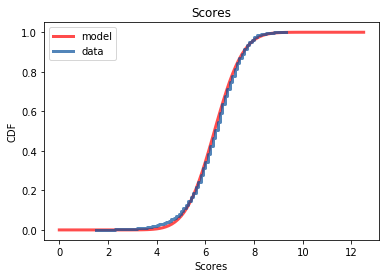

In [14]:
#comparing the cdf of a normal distribution to the CDF of the variable "score"
mu, var = thinkstats2.TrimmedMeanVar(score, p=0.01)
print('Mean, Var', mu, var)
    
# plotting the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='red')

# plotting the data
cdf = thinkstats2.Cdf(score, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Scores',
                 xlabel='Scores',
                 ylabel='CDF')
print("The model seems to fit the data well except in the left tail")
print("The normal probability plot should be created to check further.")

We observe that there are deviations from the model in the tails. The normal destribution that we learned about in Chapter 5 does not describe the destribution of the variable score well in the tails.
Both the highest and the lowest scores are lower compared to what the normal distribution model expects them to be.


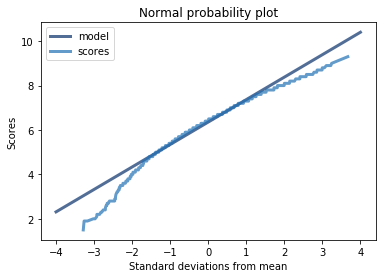

In [15]:
#Creating a normal probability plot for the scores. 
def MakeNormalPlot(score):
    mean = score.mean()
    std = score.std()


    xs=[-4,4]
    fxs, fys =thinkstats2.FitLine(xs, inter = mean, slope = std)
    thinkplot.Plot(fxs, fys, label='model')
    
    xs, ys = thinkstats2.NormalProbability(score)
    thinkplot.Plot(xs, ys, label='scores')
    plt.legend(loc="upper left")
    thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Scores')
MakeNormalPlot(score)
print('We observe that there are deviations from the model in the tails. The normal destribution that we learned about in Chapter 5 does not describe the destribution of the variable score well in the tails.')
print('Both the highest and the lowest scores are lower compared to what the normal distribution model expects them to be.')

Lognormal distribution doesn't look like a good match for the data.


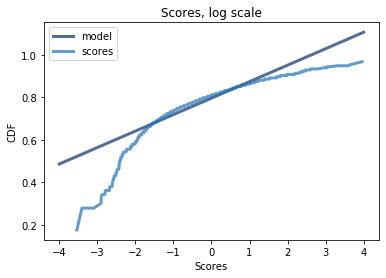

In [16]:
#Checking if lognormal distribution would work better
log_score = np.log10(score)
MakeNormalPlot(log_score)
thinkplot.Config(title='Scores, log scale', xlabel='Scores',
                 ylabel='CDF', loc='upper right')
plt.legend(loc="upper left")
print("Lognormal distribution doesn't look like a good match for the data.")

Pareto distribution. The model does not fit the data well in the tails.


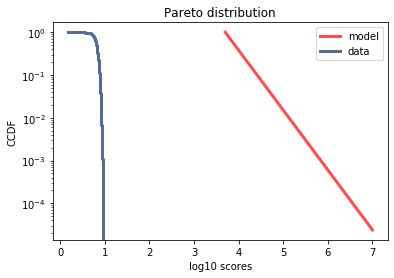

In [17]:
#plotting Pareto distribution
cdf = thinkstats2.Cdf(score, label='data')
cdf_log = thinkstats2.Cdf(log_score, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000,alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='red')

thinkplot.Cdf(cdf_log, complement=True) 
plt.title('Pareto distribution')
thinkplot.Config(xlabel='log10 scores',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')
plt.legend(loc="upper right")
print('Pareto distribution. The model does not fit the data well in the tails.')

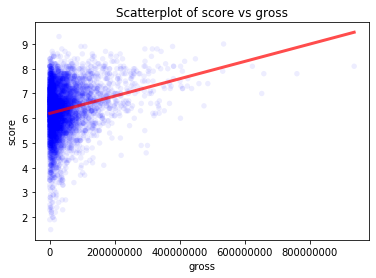

In [18]:
#Creating a scatterplot for the variables score and gross
from thinkstats2 import Mean, MeanVar, Var, Std, Cov
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope
LeastSquares(gross, score)
thinkplot.Scatter(gross, score, alpha=0.07)
#using the function from the book on page 119 to fit Least Squares
inter, slope = thinkstats2.LeastSquares(gross, score)
fit_xs, fit_ys = thinkstats2.FitLine(gross, inter, slope)
plt.ticklabel_format(useOffset=False, style='plain')
thinkplot.Plot(fit_xs, fit_ys, color='red')
plt.title('Scatterplot of score vs gross')
thinkplot.Config(xlabel='gross', ylabel='score', legend=False)

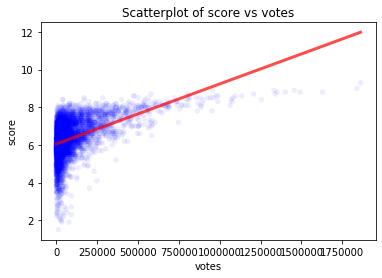

In [28]:
#Creating a scatterplot for the variables score and votes
from thinkstats2 import Mean, MeanVar, Var, Std, Cov
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope
LeastSquares(votes, score)
thinkplot.Scatter(votes, score, alpha=0.07)
#using the function from the book on page 119 to fit Least Squares
inter, slope = thinkstats2.LeastSquares(votes, score)
fit_xs, fit_ys = thinkstats2.FitLine(votes, inter, slope)
plt.ticklabel_format(useOffset=False, style='plain')
thinkplot.Plot(fit_xs, fit_ys, color='red')
plt.title('Scatterplot of score vs votes')
thinkplot.Config(xlabel='votes', ylabel='score', legend=False)

We can tell that the relationship is weak as a lot of points are scattered away from the line


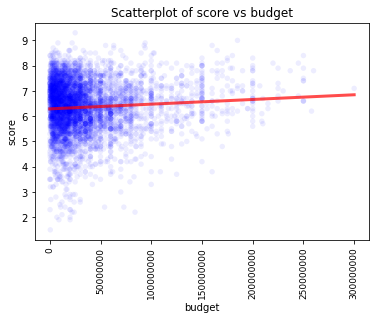

In [29]:
#Creating a scatterplot for the variables score and budget
LeastSquares(budget, score)
thinkplot.Scatter(budget, score, alpha=0.07)
#using the function from the book on page 119
inter, slope = thinkstats2.LeastSquares(budget, score)
fit_xs, fit_ys = thinkstats2.FitLine(budget, inter, slope)
thinkplot.Plot(fit_xs, fit_ys, color='red')
plt.title('Scatterplot of score vs budget')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 90, fontsize=9)
thinkplot.Config(xlabel='budget', ylabel='score', legend=False)
print("We can tell that the relationship is weak as a lot of points are scattered away from the line")

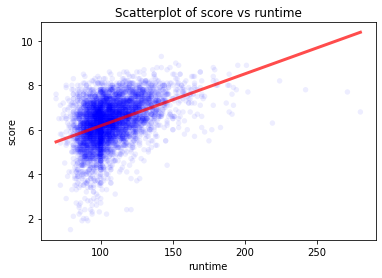

In [30]:
#Creating a scatterplot for the variables score and runtime
LeastSquares(runtime, score)
thinkplot.Scatter(runtime, score, alpha=0.07)
#using the function from the book on page 119
inter, slope = thinkstats2.LeastSquares(runtime, score)
fit_xs, fit_ys = thinkstats2.FitLine(runtime, inter, slope)
thinkplot.Plot(fit_xs, fit_ys, color='red')
plt.title('Scatterplot of score vs runtime')
thinkplot.Config(xlabel='runtime', ylabel='score', legend=False)

In [31]:
#Calculating covarince for 4 pairs of variables which should let us know the direction of relationship between the two variables

In [32]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

print(Cov(gross, score))
print('Covariance is positive which means that variables "gross" and "score" tend to increase together')

15382930.280209737
Covariance is positive which means that variables "gross" and "score" tend to increase together


In [33]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

print(Cov(votes, score))
print('Covariance is positive which means that variables "votes" and "score" tend to increase together')

71071.6438416564
Covariance is positive which means that variables "votes" and "score" tend to increase together


In [34]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

print(Cov(budget, score))
print('Covariance is positive which means that variables "budget" and "score" tend to increase together')

2972822.231267399
Covariance is positive which means that variables "budget" and "score" tend to increase together


In [35]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

print(Cov(runtime, score))
print('Covariance is positive which means that variables "runtime" and "score" tend to increase together')

7.597574687681358
Covariance is positive which means that variables "runtime" and "score" tend to increase together


In [36]:
#Calculating correlation coefficients for the 4 pairs of variables

In [37]:
#Calculating correlation coefficients for gross and score
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr(gross, score)

0.22955222364472297

In [38]:
np.corrcoef(gross, score)

array([[1.        , 0.22955222],
       [0.22955222, 1.        ]])

In [39]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)
SpearmanCorr(gross, score)

0.14866632964092932

In [40]:
print('There is no clear strong positive linear relationship between the two variables. Correlation coefficient is 0.2, which indicates a very weak positive correlation. ')

There is no clear strong positive linear relationship between the two variables. Correlation coefficient is 0.2, which indicates a very weak positive correlation. 


In [41]:
#Calculating correlation coefficients for votes and score
np.corrcoef(votes, score)

array([[1.        , 0.47064818],
       [0.47064818, 1.        ]])

In [42]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr(votes, score)

0.4706481838712041

In [43]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)
SpearmanCorr(votes, score)

0.48654473279941063

In [44]:
print('Correlation coefficient of 0.49 indicates evidence of a linear relationship that is close to moderate positive linear relationship')

Correlation coefficient of 0.49 indicates evidence of a linear relationship that is close to moderate positive linear relationship


In [45]:
#Calculating correlation coefficients for budget and score
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr( budget, score)

0.07357931787944047

In [46]:
np.corrcoef(budget, score)

array([[1.        , 0.07357932],
       [0.07357932, 1.        ]])

In [47]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)
SpearmanCorr(budget, score)

-0.01251509307528452

In [48]:
print('Creating a simple linear regression model where I get the change in scores as a function of budget to see whether the relationship is positive')
import statsmodels.formula.api as smf
formula = ('score ~ budget')
results = smf.ols(formula, data=df).fit()
#using thinkstats function instead of results.summary to get the main results and compare RMSEs.
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)


Creating a simple linear regression model where I get the change in scores as a function of budget to see whether the relationship is positive
Intercept   6.29   (0)
budget   1.86e-09   (5.26e-07)
R^2 0.005414
Std(ys) 1.011
Std(res) 1.008


In [49]:
print("By looking at the correlation coefficients we can tell that there is extremely weak positive relationship. A movie with a high budget does not guarantee a  high popularity rating. Also, the Spearman and Pearson coefficients have diiferent signs.")
print("I believe the relationship is extremely weak, statistically significant and positive. My explanation: covariance is positive, simple regression shows a positive relationship and the plot showed more of a positive relationship, and I was able to fit Linear Squares without a curvature.")
print("I believe that results of a Pearson's correlation are more correct.")

By looking at the correlation coefficients we can tell that there is extremely weak positive relationship. A movie with a high budget does not guarantee a  high popularity rating. Also, the Spearman and Pearson coefficients have diiferent signs.
I believe the relationship is extremely weak, statistically significant and positive. My explanation: covariance is positive, simple regression shows a positive relationship and the plot showed more of a positive relationship, and I was able to fit Linear Squares without a curvature.
I believe that results of a Pearson's correlation are more correct.


In [50]:
#looking at covariance of runtime and score
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr(runtime, score)

0.4170308090019616

In [51]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)
SpearmanCorr(runtime, score)

0.4195377570050138

In [52]:
print('There is a positive linear relationship between two variables "runtime" and "score". Correlation coefficient is 0.41 which is an indicator of a relationship close to moderate linear realationship.')

There is a positive linear relationship between two variables "runtime" and "score". Correlation coefficient is 0.41 which is an indicator of a relationship close to moderate linear realationship.


For the test that checks whether the differences between the scores of horror movies and the scores of other genres is statistically significant we get p-value:  0.0
This is a small p-value which indicates that the differences are statistically significant.
---------------------------------------------------------------------------


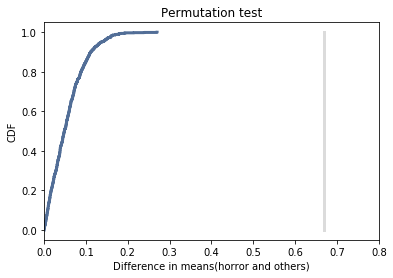

As we can see, our simulation did not yield the effect as big as the observed difference of means we calculated earlier 0.67 score points.
p-value is  0.0 . The difference in scores is statistically significant.
---------------------------------------------------------------------------
Testing significance of relationships between variables:
---------------------------------------------------------------------------

The null hypothesis is that correlation between the value "gross" and the value "score" does not exist.
p value of 0.0 is good evidence to reject the null hypothesis that there is no correlation. The correlation observed is statistically significant.
The null hypothesis is that correlation between the value "votes" and the value "score" does not exist.
p value of 0.0 is good evidence to reject the null hypothesis that there is no correlation. The correlation observed is statistically significant.
The null hypothesis is that correlation between the value "budget" and the v

<Figure size 576x432 with 0 Axes>

In [53]:
# Working with the horror and others for this assignment to test the hypothesis that horror movies are rated low.
#Also, testing the correlation between the variables.
#Using thinkstats functions and classes I am running a few tests to see the p-values. 
import thinkstats2
import numpy as np
import first
import random
 
#Creating a class ScoresTest which should help with the Chi-Squared .
class ScoresTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        horror_scores = score_horror.values
        others_scores = score_others.values
        horror_scores, others_scores = self.data
        self.n = len(score_horror)
        self.pool = np.hstack((horror_scores, others_scores))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(1, 10)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        horror_scores, others_scores = data
        stat = self.ChiSquared(horror_scores) + self.ChiSquared(others_scores)
        return stat

    def ChiSquared(self, scores):
        hist = thinkstats2.Hist(scores)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(scores)
        stat = sum((observed - expected)**2 / expected)
        return stat

# comparing scores of horror movies and those of other genres
data = score_horror.values, score_others.values
ht = ScoresTest(data)
iters = 1000
p3 = ht.PValue(iters=iters)
print('For the test that checks whether the differences between the scores of horror movies and the scores of other genres is statistically significant we get p-value: ',p3)
print('This is a small p-value which indicates that the differences are statistically significant.')

#The null hypothesis is that the distributions for horror scores and others are the same. 
#Using permutation we will model the null hypothesis
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
data = (score_horror.values,score_others.values)
iters = 1000
ht = DiffMeansPermute(data)
p1 = ht.PValue(iters=iters)
print("---------------------------------------------------------------------------")
ht.PlotCdf()
plt.title('Permutation test')
plt.xlim(0.0, 0.8)
thinkplot.Show(xlabel = 'Difference in means(horror and others)',ylabel = 'CDF')
print('As we can see, our simulation did not yield the effect as big as the observed difference of means we calculated earlier 0.67 score points.')
print('p-value is ', p1, '. The difference in scores is statistically significant.')
print('---------------------------------------------------------------------------')
print('Testing significance of relationships between variables:')
print('---------------------------------------------------------------------------\n')
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
df1 = df.dropna(subset=['score', 'gross'])
data = df1.gross.values, df1.score.values
ht = CorrelationPermute(data)
p2 = ht.PValue(iters=iters)
print('The null hypothesis is that correlation between the value "gross" and the value "score" does not exist.')
print('p value of', p2, 'is good evidence to reject the null hypothesis that there is no correlation. The correlation observed is statistically significant.')
df1 = df.dropna(subset=['score', 'votes'])
data = df1.votes.values, df1.score.values
ht = CorrelationPermute(data)
p2 = ht.PValue(iters=iters)
print('The null hypothesis is that correlation between the value "votes" and the value "score" does not exist.')
print('p value of', p2, 'is good evidence to reject the null hypothesis that there is no correlation. The correlation observed is statistically significant.')
df1 = df.dropna(subset=['score', 'budget'])
data = df1.budget.values, df1.score.values
ht = CorrelationPermute(data)
p2 = ht.PValue(iters=iters)
print('The null hypothesis is that correlation between the value "budget" and the value "score" does not exist.')
print('p value of', p2, 'is good evidence to reject the null hypothesis that there is no correlation. The correlation observed is statistically significant.')

df1 = df.dropna(subset=['score', 'runtime'])
data = df1.runtime.values, df1.score.values
ht = CorrelationPermute(data)
p2 = ht.PValue(iters=iters)
print('The null hypothesis is that correlation between the value "runtime" and the value "score" does not exist.')
print('p value of', p2, 'is good evidence to reject the null hypothesis that there is no correlation. The correlation observed is statistically significant.')


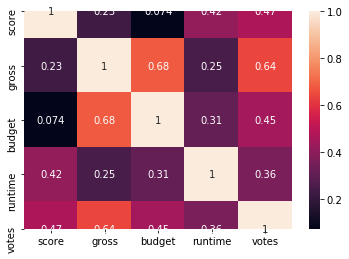

In [54]:
#Checking for possible issues with multicollinearity before we build a model. Creating a heataop to see if any of the variables are correlated highly with each other.
#gross and budget could be of concern; votes and gross could be of concern as well.
from pandas import DataFrame
import seaborn as sn
df1 = DataFrame(df,columns=['score','gross','budget', 'runtime', 'votes'])
warnings.filterwarnings('ignore')
corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True);

In [55]:
#Looking at VIF of all of the variables involved. "gross", "budget", and "votes" have values above 2. 
#According to these articles (https://www.displayr.com/variance-inflation-factors-vifs/ and another article: https://statisticalhorizons.com/multicollinearity) 
#variables gross, budget and votes could be of concern. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
X = df1.assign(const=1)
pd.Series([variance_inflation_factor(X.values, i) 
            for i in range(X.shape[1])], 
              index=X.columns)

score       1.504287
gross       2.548072
budget      2.033098
runtime     1.358285
votes       2.136156
const      66.936457
dtype: float64

In [56]:
print('Creating a multiple regression model where I get the change in scores as a function of runtime')
import statsmodels.formula.api as smf
formula = 'score~runtime'
model = smf.ols(formula, data = df)
results = model.fit()
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary() 

Creating a multiple regression model where I get the change in scores as a function of runtime
Intercept   3.84   (0)
runtime   0.0234   (1.29e-194)
R^2 0.1739
Std(ys) 1.011
Std(res) 0.9189


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     976.0
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          1.29e-194
Time:                        20:42:37   Log-Likelihood:                -6188.5
No. Observations:                4638   AIC:                         1.238e+04
Df Residuals:                    4636   BIC:                         1.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8391      0.082     46.993      0.000       3.679       3.999
runtime        0.0234      0.001     31.241      0.000       0.022       0.025
==============================================================================
Omnibus:                      403.181   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.434
Skew:                          -0.650   Prob(JB):                    7.01e-141
Kurtosis:                       4.284   Cond. No.                         660.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print('R-squared for this model is 0.1739, which indicates that variables runtime accounts for 17.4 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.09, which indicates that knowing the runtime provides some improvement to the predictions')

R-squared for this model is 0.1739, which indicates that variables runtime accounts for 17.4 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.09, which indicates that knowing the runtime provides some improvement to the predictions


In [58]:
print('Creating a multiple regression model where I get the change in scores as a function of votes')
import statsmodels.formula.api as smf
formula = 'score~votes'
model = smf.ols(formula, data = df)
results = model.fit()
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary() 

Creating a multiple regression model where I get the change in scores as a function of votes
Intercept   6.05   (0)
votes   3.19e-06   (2.09e-254)
R^2 0.2215
Std(ys) 1.011
Std(res) 0.8921


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     1319.
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          2.09e-254
Time:                        20:42:37   Log-Likelihood:                -6050.9
No. Observations:                4638   AIC:                         1.211e+04
Df Residuals:                    4636   BIC:                         1.212e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0515      0.016    388.945      0.000       6.021       6.082
votes       3.185e-06   8.77e-08     36.320      0.000    3.01e-06    3.36e-06
==============================================================================
Omnibus:                      643.538   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1189.842
Skew:                          -0.887   Prob(JB):                    4.26e-259
Kurtosis:                       4.734   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
print("The warning about potential multicollinearity.")
print('R-squared for this model is 0.222, which indicates that variable "votes" accounts for 22.2 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1189, which indicates that knowing the "votes" provides some improvement to the predictions')

The warning about potential multicollinearity.
R-squared for this model is 0.222, which indicates that variable "votes" accounts for 22.2 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1189, which indicates that knowing the "votes" provides some improvement to the predictions


In [60]:
print('Creating a multiple regression model where I get the change in scores as a function of  gross')
formula = ('score ~ gross')
results = smf.ols(formula, data=df).fit()
#using thinkstats function instead of results.summary to get the main results and compare RMSEs.
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary()

Creating a multiple regression model where I get the change in scores as a function of  gross
Intercept   6.2   (0)
gross   3.5e-09   (1.62e-56)
R^2 0.05269
Std(ys) 1.011
Std(res) 0.9841


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     257.9
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           1.62e-56
Time:                        20:42:40   Log-Likelihood:                -6506.0
No. Observations:                4638   AIC:                         1.302e+04
Df Residuals:                    4636   BIC:                         1.303e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1950      0.018    352.003      0.000       6.161       6.230
gross       3.501e-09   2.18e-10     16.059      0.000    3.07e-09    3.93e-09
==============================================================================
Omnibus:                      382.413   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.742
Skew:                          -0.659   Prob(JB):                    7.72e-122
Kurtosis:                       4.071   Cond. No.                     9.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
print("The warning about potential multicollinearity.")
print('R-squared for this model is 0.05, which indicates that variable "gross" accounts for 5 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.0269, which indicates that knowing the "gross" provides some but very little improvement to the predictions')

The warning about potential multicollinearity.
R-squared for this model is 0.05, which indicates that variable "gross" accounts for 5 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.0269, which indicates that knowing the "gross" provides some but very little improvement to the predictions


In [62]:
print('Creating a multiple regression model where I get the change in scores as a function of budget')
formula = ('score ~ budget')
results = smf.ols(formula, data=df).fit()
#using thinkstats function instead of results.summary to get the main results and compare RMSEs.
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary()

Creating a multiple regression model where I get the change in scores as a function of budget
Intercept   6.29   (0)
budget   1.86e-09   (5.26e-07)
R^2 0.005414
Std(ys) 1.011
Std(res) 1.008


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.24
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           5.26e-07
Time:                        20:42:47   Log-Likelihood:                -6619.0
No. Observations:                4638   AIC:                         1.324e+04
Df Residuals:                    4636   BIC:                         1.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2890      0.020    314.998      0.000       6.250       6.328
budget      1.861e-09   3.71e-10      5.023      0.000    1.13e-09    2.59e-09
==============================================================================
Omnibus:                      378.019   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.528
Skew:                          -0.653   Prob(JB):                    1.73e-120
Kurtosis:                       4.071   Cond. No.                     7.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
print("The warning about potential multicollinearity.")
print('R-squared for this model is 0.005414, which indicates that variable "budget" accounts for 0.5 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.003, which indicates that knowing the "budget" provides extremely little improvement to the predictions')

The warning about potential multicollinearity.
R-squared for this model is 0.005414, which indicates that variable "budget" accounts for 0.5 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.003, which indicates that knowing the "budget" provides extremely little improvement to the predictions


In [64]:
print('Creating a multiple regression model where I get the change in scores as a function of runtime and votes')
import statsmodels.formula.api as smf
formula = 'score~runtime+votes'
model = smf.ols(formula, data = df)
results = model.fit()
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary() 

Creating a multiple regression model where I get the change in scores as a function of runtime and votes
Intercept   4.4   (0)
runtime   0.016   (1.23e-97)
votes   2.49e-06   (1.84e-157)
R^2 0.292
Std(ys) 1.011
Std(res) 0.8507


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     955.7
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:42:54   Log-Likelihood:                -5830.9
No. Observations:                4638   AIC:                         1.167e+04
Df Residuals:                    4635   BIC:                         1.169e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4004      0.078     56.207      0.000       4.247       4.554
runtime        0.0160      0.001     21.479      0.000       0.015       0.017
votes       2.492e-06   8.97e-08     27.801      0.000    2.32e-06    2.67e-06
==============================================================================
Omnibus:                      617.939   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1142.438
Skew:                          -0.857   Prob(JB):                    8.37e-249
Kurtosis:                       4.725   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
print("The warning about potential multicollinearity.")
print('R-squared for this model is 0.292, which indicates that variables runtime and votes account for 29.2 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1603, which indicates that knowing the runtime and votes provides improvement to the prediction since it is greater than that of improvement from just knowing runtime, or votes, or gross, or budget.')

The warning about potential multicollinearity.
R-squared for this model is 0.292, which indicates that variables runtime and votes account for 29.2 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1603, which indicates that knowing the runtime and votes provides improvement to the prediction since it is greater than that of improvement from just knowing runtime, or votes, or gross, or budget.


In [66]:
print('Creating a multiple regression model where I get the change in scores as a function of runtime, votes and gross')
formula = ('score ~ runtime+votes+gross')
results = smf.ols(formula, data=df).fit()
#using thinkstats function instead of results.summary to get the main results and compare RMSEs.
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary()

Creating a multiple regression model where I get the change in scores as a function of runtime, votes and gross
Intercept   4.42   (0)
runtime   0.0162   (3.7e-101)
votes   3.07e-06   (1.39e-152)
gross   -2.06e-09   (4.15e-17)
R^2 0.3027
Std(ys) 1.011
Std(res) 0.8443


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     670.6
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:43:01   Log-Likelihood:                -5795.5
No. Observations:                4638   AIC:                         1.160e+04
Df Residuals:                    4634   BIC:                         1.162e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4193      0.078     56.852      0.000       4.267       4.572
runtime        0.0162      0.001     21.890      0.000       0.015       0.018
votes       3.073e-06   1.12e-07     27.328      0.000    2.85e-06    3.29e-06
gross      -2.063e-09   2.44e-10     -8.441      0.000   -2.54e-09   -1.58e-09
==============================================================================
Omnibus:                      691.708   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.195
Skew:                          -0.916   Prob(JB):                    1.77e-298
Kurtosis:                       4.933   Cond. No.                     5.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
print('R-squared for this model is 0.3027, which indicates that variables runtime, votes and gross account for 30.3 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1667, which indicates that knowing the runtime, votes and gross provides improvement to the predictions compared to the two previous models')
print("The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.")


R-squared for this model is 0.3027, which indicates that variables runtime, votes and gross account for 30.3 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1667, which indicates that knowing the runtime, votes and gross provides improvement to the predictions compared to the two previous models
The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.


In [68]:
formula = ('score ~ runtime +votes+budget')
results = smf.ols(formula, data=df).fit()
#using thinkstats function instead of results.summary to get the main results and compare RMSEs.
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary()

Intercept   4.31   (0)
runtime   0.0183   (9.62e-129)
votes   3.11e-06   (5.47e-216)
budget   -5.97e-09   (6.1e-65)
R^2 0.3349
Std(ys) 1.011
Std(res) 0.8246


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     777.7
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:43:29   Log-Likelihood:                -5685.9
No. Observations:                4638   AIC:                         1.138e+04
Df Residuals:                    4634   BIC:                         1.141e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3102      0.076     56.663      0.000       4.161       4.459
runtime        0.0183      0.001     24.920      0.000       0.017       0.020
votes       3.114e-06   9.41e-08     33.111      0.000    2.93e-06     3.3e-06
budget      -5.97e-09   3.45e-10    -17.288      0.000   -6.65e-09   -5.29e-09
==============================================================================
Omnibus:                      782.742   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.799
Skew:                          -0.977   Prob(JB):                         0.00
Kurtosis:                       5.273   Cond. No.                     3.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
print('R-squared for this model is 0.3349, which indicates that variables runtime, votes and budget account for 33.5 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1864, which indicates that knowing the runtime, votes and budget provides improvement to the predictions compared to the two previous models')
print("The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.")


R-squared for this model is 0.3349, which indicates that variables runtime, votes and budget account for 33.5 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1864, which indicates that knowing the runtime, votes and budget provides improvement to the predictions compared to the two previous models
The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.


In [70]:
formula = 'score ~ runtime+budget+votes+gross'
results = smf.ols(formula, data=df).fit()
SummarizeResults(results)
results.summary()

Intercept   4.3   (0)
runtime   0.0184   (3.6e-129)
budget   -6.35e-09   (4.65e-50)
votes   3.02e-06   (9.84e-155)
gross   4.59e-10   (0.115)
R^2 0.3352
Std(ys) 1.011
Std(res) 0.8244


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     584.1
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:43:46   Log-Likelihood:                -5684.7
No. Observations:                4638   AIC:                         1.138e+04
Df Residuals:                    4633   BIC:                         1.141e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3002      0.076     56.346      0.000       4.151       4.450
runtime        0.0184      0.001     24.965      0.000       0.017       0.020
budget     -6.352e-09   4.22e-10    -15.057      0.000   -7.18e-09   -5.52e-09
votes       3.025e-06    1.1e-07     27.538      0.000    2.81e-06    3.24e-06
gross       4.592e-10   2.92e-10      1.575      0.115   -1.12e-10    1.03e-09
==============================================================================
Omnibus:                      775.174   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1707.612
Skew:                          -0.972   Prob(JB):                         0.00
Kurtosis:                       5.249   Cond. No.                     5.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
print("The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.")
print('R-squared for this model is 0.335, which indicates that variables runtime, budget, votes and gross account for 33.5 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1866, which indicates that knowing the runtime, budget, votes and gross provides improvement to the predictions')

The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.
R-squared for this model is 0.335, which indicates that variables runtime, budget, votes and gross account for 33.5 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1866, which indicates that knowing the runtime, budget, votes and gross provides improvement to the predictions


In [72]:
#When we looked at the correlation between score and budget, the relationship was very weak. 
#I wanted to see that if the relationship between budget and score is nonlinear, then fitting a polynomial might improve the model.
df['budget2'] = df.budget**2
formula = 'score ~ runtime+budget+votes+gross+budget2'
results = smf.ols(formula, data=df).fit()
SummarizeResults(results)
results.summary()

Intercept   0.000548   (0)
runtime   0.0592   (0)
budget   -1.01e-08   (1.28e-21)
votes   1.61e-06   (1.31e-30)
gross   1.8e-09   (1.99e-06)
budget2   1.4e-17   (0.014)
R^2 -0.1223
Std(ys) 1.011
Std(res) 1.068


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                      -0.122
Model:                            OLS   Adj. R-squared:                 -0.123
Method:                 Least Squares   F-statistic:                    -126.3
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               1.00
Time:                        20:44:02   Log-Likelihood:                -6899.2
No. Observations:                4638   AIC:                         1.381e+04
Df Residuals:                    4633   BIC:                         1.384e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005   2.45e-06    223.311      0.000       0.001       0.001
runtime        0.0592      0.000    223.311      0.000       0.059       0.060
budget     -1.014e-08   1.06e-09     -9.599      0.000   -1.22e-08   -8.07e-09
votes       1.612e-06   1.39e-07     11.584      0.000    1.34e-06    1.89e-06
gross       1.802e-09   3.78e-10      4.760      0.000    1.06e-09    2.54e-09
budget2     1.403e-17   5.71e-18      2.457      0.014    2.84e-18    2.52e-17
==============================================================================
Omnibus:                      766.765   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3011.985
Skew:                          -0.778   Prob(JB):                         0.00
Kurtosis:                       6.629   Cond. No.                     4.79e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
print("R squared is negative and is an indicator that the model doesn't follow the trend of the data.")


R squared is negative and is an indicator that the model doesn't follow the trend of the data.


In [74]:
print('Creating a multiple regression model where I get the change in scores as a function of runtime and gross')
formula = ('score ~ runtime+gross')
results = smf.ols(formula, data=df).fit()
#using thinkstats function instead of results.summary to get the main results and compare RMSEs.
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary()

Creating a multiple regression model where I get the change in scores as a function of runtime and gross
Intercept   3.95   (0)
runtime   0.0215   (3.02e-160)
gross   2.02e-09   (5.24e-22)
R^2 0.1903
Std(ys) 1.011
Std(res) 0.9098


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     544.8
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          3.23e-213
Time:                        20:44:14   Log-Likelihood:                -6142.0
No. Observations:                4638   AIC:                         1.229e+04
Df Residuals:                    4635   BIC:                         1.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9485      0.082     48.346      0.000       3.788       4.109
runtime        0.0215      0.001     28.069      0.000       0.020       0.023
gross        2.02e-09   2.08e-10      9.693      0.000    1.61e-09    2.43e-09
==============================================================================
Omnibus:                      400.312   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.338
Skew:                          -0.655   Prob(JB):                    9.83e-137
Kurtosis:                       4.235   Cond. No.                     4.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
print('R-squared for this model is 0.1903, which indicates that variables runtime and gross account for 19 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1012, which indicates that knowing the runtime and gross provides improvement to the predictions')

R-squared for this model is 0.1903, which indicates that variables runtime and gross account for 19 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1012, which indicates that knowing the runtime and gross provides improvement to the predictions


In [76]:
print('Creating a multiple regression model where I get the change in scores as a function of runtime, and budget')
formula = ('score ~ budget+runtime')
results = smf.ols(formula, data=df).fit()
#using thinkstats function instead of results.summary to get the main results and compare RMSEs.
def SummarizeResults(results):
    for name, param in results.params.items():
        pvalue = results.pvalues[name]
        print('%s   %0.3g   (%.3g)' % (name, param, pvalue))

    try:
        print('R^2 %.4g' % results.rsquared)
        ys = results.model.endog
        print('Std(ys) %.4g' % ys.std())
        print('Std(res) %.4g' % results.resid.std())
    except AttributeError:
        print('R^2 %.4g' % results.prsquared)
SummarizeResults(results)
results.summary()

Creating a multiple regression model where I get the change in scores as a function of runtime, and budget
Intercept   3.78   (0)
budget   -1.6e-09   (6.84e-06)
runtime   0.0245   (1.67e-193)
R^2 0.1775
Std(ys) 1.011
Std(res) 0.9169


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     500.2
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          2.04e-197
Time:                        20:44:29   Log-Likelihood:                -6178.4
No. Observations:                4638   AIC:                         1.236e+04
Df Residuals:                    4635   BIC:                         1.238e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7775      0.083     45.696      0.000       3.615       3.940
budget     -1.598e-09   3.55e-10     -4.504      0.000   -2.29e-09   -9.02e-10
runtime        0.0245      0.001     31.142      0.000       0.023       0.026
==============================================================================
Omnibus:                      412.894   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.595
Skew:                          -0.652   Prob(JB):                    1.62e-148
Kurtosis:                       4.350   Cond. No.                     3.31e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
print("The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.")
print('R-squared for this model is 0.1775, which indicates that variables runtime and budget account for 17.8 percent of the variation in the scores')
print('The parameters are statistically significant.')
print('The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.0941, which indicates that knowing the runtime and budget provides a little bit of  improvement to the predictions')

The warning about potential multicollinearity. One of the coefficients changed the sign - unstable behavior.
R-squared for this model is 0.1775, which indicates that variables runtime and budget account for 17.8 percent of the variation in the scores
The parameters are statistically significant.
The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.0941, which indicates that knowing the runtime and budget provides a little bit of  improvement to the predictions


In [80]:
#Models analysis:
#All of these models are statistically significant. By squaring the budget variable in model 8 ,
#I was trying to see if the relationship between budget and score was polynomial. 
#R-squared for the model resulted in a negative number which is a clear indicator that this model does not fit the data. 
#My conclusion is the same: the relationship between these two variables is linear, positive and very weak. 
#The warning of possible multicollinearity shows for all of the models except for the simple regression model of score~runtime. 
#Since there can’t be multicollinearity in simple regression models, the warning should be disregarded for this type of model.
#Variables gross and budget act unstable by changing their sign in some of the models. 
#When the sign is changed (a dramatic change in a coefficient) the models could be affected by multicollinearity (https://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis).
#Multicollinearity can make interpreting results problematic. This analysis was problematic because of the changes in the sign of coefficients of the variables that have high VIF, and have correlation close to high.
#Decision to interpret results for the models with the variables staying stable overall was made.
#By looking only at the models that do not experience any sign of significant change in their variables
#and taking into account information about VIF and correlation coefficients, the model that has the highest R-squared and the highest difference
#between Std(ys) and Std(res) is the model score~runtime+votes. R-squared of 0.292 indicates that variables runtime and votes account for 29.2 percent of the variation in the scores.
#The difference between the standard deviation of the outcome variable "score" and the standard deviation of the residuals is 0.1603 which  indicates that knowing the runtime and votes provides improved prediction since the value is greater than that of improvement from just knowing runtime, or votes, or not knowing any  information about these variables at all. 
#The parameters of the model are statistically significant.


In [81]:
#Limitations
#The project has some limitations. Even though it provides results for effects of variables budget, gross, runtime and votes,
#it doesn’t explain other factors that could be influencing the outcome “scores”. 
#Considering performing the analyzes of other variables from the data set can allow for discovery of 
#additional factors influencing the outcome variable “score”.
#Missing values significantly reduced the amount of observations available thus reducing the possibility of accounting
#for all of the information for the variables. Looking for the sources containing the information that was missing 
#could potentially solve this issue. 
#Additional analysis of all of the assumptions that multiple linear regression model should meet for valid results
#can be considered to double check the validity of the model and its results. 
#The movies analyzed are made within time frame of 1986-2016. New information for the modt recent years could be added 
#and analyzed for more up-to-date results.


In [ ]:
#Conclusion
#The analysis performed showed that there are 4 positive relationships between each of the independent variables
#and the outcome variable score that are statistically significant.  The relationship of votes and score, runtime and score 
#are close to moderate positive linear. The relationships of gross and score, budget and score are very weak positive linear. 
#Additional analysis of the budget and score relationship was needed due to opposite signs in Pearson’s and Spearman’s
#correlations. The behavior of the variable “budget” was paid extra attention to in the models. 
#Possible issue of multicollinearity for variables budget and gross resulted in their omission in the final model 
#thus making runtime and votes being accountable for better prediction of scores given by the user.
#It is important to remember that the relationships discovered do not imply causation. 
#Hypothesis of scores of horror movies vs other genres of movies being rated lower was tested with the help of CDFs, 
#PMFs, chi-square test. The difference between the scores of these two variables was concluded to be statistically significant,
#with PMFs and CDFs illustrating the lower scores for horror movies genres being more prevalent than those of the other genres.

